## Exploring Weather Data for Oxford 

The purpose of this project is to explore `Weather` station data for Oxford in the United Kingdom using the techniques I have learned so far. 

I have started with the data and asked questions as I have gone along based on the results that I have obtained. 

 

# The dataset

Explore the data here:

https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data

> **`Year`** is the year the record was made

> **`Month`** is the month the record was made

> **`Max_C`** is the mean daily maximum temperature recorded in that month

> **`Min_C`** is the mean daily lowest temperature recorded in that month

> **`Rain_mm`** is the rainfall that month recorded in millimeters

> **`Sun`** is the amount of sunlight recorded in that month

#### Notes

The header of the data states that some values are estimated and highlighted with an asterix: **`*`**

`Missing Data` is highlighted with **`---`** which I will also need to deal with.

In [4]:
from csv import reader
import os
os.listdir()


['.ipynb_checkpoints',
 'weather2Oxford.csv',
 'Weather 2 Oxford CSV LOL.ipynb',
 '.git',
 'README.md']

In [5]:
data = list(reader(open("weather2Oxford.csv")))

In [6]:
header, data = data[0], data[1:]
def print_three(data, f=True):
    if f:
        for row in data[:3]:
            print(row)
            print("\n")
    else:
        for row in data[-3:]:
            print(row)
            print("\n")


print_three(data)
print_three(data, False)

['   1853   1    8.4     2.7       4    62.8     ---']


['   1853   2    3.2    -1.8      19    29.3     ---']


['   1853   3    7.7    -0.6      20    25.9     ---']


['   2020  10   14.3*    8.2       0   172.3    72.4*  Provisional']


['   2020  11   12.1*    6.9       4    35.4    62.4   Provisional']


['   2020  12    8.1     3.4       6    99.4    59.7   Provisional']




## Initial Data set up

Instead of the columns of data being stored in a CSV format, the data is all held in one column which means that I need to extract each data point to its own column. 

 

In [7]:
cleaned_data = []
bad_chars = ["(", ")", "[", ",", "'"]

def remove_chars(string):
    for char in bad_chars:
        string.replace(char, "")

for item in data:
    item = str(item)
    item = item.replace("'", "")
    item = item.split()
    row0 = item[0]
    row1 = item[1]
    row2 = item[2]
    row3 = item[3]
    row4 = item[4]
    row5 = item[5]
    row6 = item[6]
    row7 = item[7]
    cleaned_data.append([row1, row2, row3, row4, row5, row6])
   

In the code below I should have extracted the min temps to a list at the same time. 

Plus I could turn this into a function where you specify dataset and index. 

In [8]:
max_temps = []

for row in cleaned_data:
    #print(type(row[2]))
    temp = row[2]
    temp = temp.replace("*", "")     
    temp = float(temp)
    max_temps.append(temp)
    
len(max_temps)
max_temp = max(max_temps)
min_temp = min(max_temps)
print("There are ", len(max_temps), "records and the highest temp is ", max_temp, " and the lowest is ", min_temp)

There are  2016 records and the highest temp is  27.4  and the lowest is  -0.2


In [9]:
print_three(cleaned_data)

['1853', '1', '8.4', '2.7', '4', '62.8']


['1853', '2', '3.2', '-1.8', '19', '29.3']


['1853', '3', '7.7', '-0.6', '20', '25.9']




In [10]:

# This function will be used to remove the * and --- from index specified
def strip_chars(input_data, index):
    bad_chars = ["*", "---"]
    for row in input_data:
        temp = row[index]
        for char in bad_chars:
            temp = temp.replace(char, "")
        row[index] = temp
    return input_data



cleaned_data = strip_chars(cleaned_data, 3)
cleaned_data = strip_chars(cleaned_data, 2)

# low_temps = {}
# for row in cleaned_data:
#     low_temp = row[3]
#     if low_temp not in low_temps:
#         low_temps[low_temp] = 1
#     else: 
#         low_temps[low_temp] += 1
        
# print(low_temps)

empty_strings = []

#In order to deal with empty strings I have chosen to give the low_temp the high_temp value for that month
for row in cleaned_data:
    if row[3] == "":
        row[3] = row[2]


The code below creates a mean average temperature for each month in cleaned_data and appends it onto cleaned_data at row6. 

mean_average = highTemp at row2 add the lowTemp at row3 and divide by two.

In [11]:
average_temps = []
for row in cleaned_data:
    high = float(row[2])
    low = float(row[3])
    avg_temp = high + low / 2
    avg_temp = round(avg_temp, 2)
    row.append(avg_temp)
    average_temps.append(avg_temp)
    
# print(cleaned_data[:5])
def print_five(data):
    for row in data[:5]:
        print(row)
        print("\n")
        
print(min(average_temps))
print(max(average_temps))

-3.1
34.55


In [12]:
import matplotlib.pyplot as plt


In [13]:
#Examine the first 4 rows to ensure it is set up properly
cleaned_data[:4]


[['1853', '1', '8.4', '2.7', '4', '62.8', 9.75],
 ['1853', '2', '3.2', '-1.8', '19', '29.3', 2.3],
 ['1853', '3', '7.7', '-0.6', '20', '25.9', 7.4],
 ['1853', '4', '12.6', '4.5', '0', '60.1', 14.85]]

In [14]:
for row in cleaned_data:
    
    year = row[0]
    month = row[1]
#     print(year)
#     print(month)
    year_month_day = year + month + "01"
    row.append(year_month_day)
#     print(year_month_day)
    
print(cleaned_data[:2])

[['1853', '1', '8.4', '2.7', '4', '62.8', 9.75, '1853101'], ['1853', '2', '3.2', '-1.8', '19', '29.3', 2.3, '1853201']]


In [15]:
import datetime as dt

display_dates = []
display_temps = []

for row in cleaned_data:
    date = row[7]
#     print(date)
    date = dt.datetime.strptime(date, "%Y%m%d")
#     print(date)
    temps = row[6]
    display_dates.append(date)
    display_temps.append(temps)

I will first examine the data for one year by extracting the 12 monthly figures for `1853` to a list.

In [16]:
cleaned_data[0]
a1853 = []

for row in cleaned_data:
    year = row[0]
    if year == "1853":
        a1853.append(row)
        
a1853

[['1853', '1', '8.4', '2.7', '4', '62.8', 9.75, '1853101'],
 ['1853', '2', '3.2', '-1.8', '19', '29.3', 2.3, '1853201'],
 ['1853', '3', '7.7', '-0.6', '20', '25.9', 7.4, '1853301'],
 ['1853', '4', '12.6', '4.5', '0', '60.1', 14.85, '1853401'],
 ['1853', '5', '16.8', '6.1', '0', '59.5', 19.85, '1853501'],
 ['1853', '6', '20.1', '10.7', '0', '82.0', 25.45, '1853601'],
 ['1853', '7', '21.2', '12.2', '0', '86.2', 27.3, '1853701'],
 ['1853', '8', '20.2', '10.8', '0', '72.3', 25.6, '1853801'],
 ['1853', '9', '17.3', '8.4', '0', '51.3', 21.5, '1853901'],
 ['1853', '10', '13.9', '7.4', '0', '102.3', 17.6, '18531001'],
 ['1853', '11', '8.7', '2.3', '10', '49.6', 9.85, '18531101'],
 ['1853', '12', '3.7', '-1.3', '19', '10.7', 3.05, '18531201']]

In [17]:
a1853_dates = []
a1853_temps = []

for row in a1853:
    a1853_dates.append(row[7])
    a1853_temps.append(row[6])

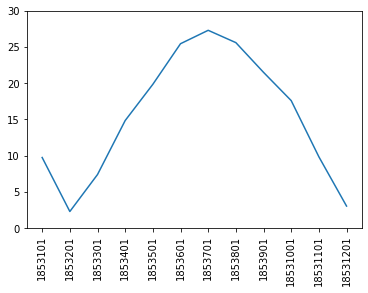

In [18]:
%matplotlib inline
plt.plot(a1853_dates, a1853_temps)
plt.xticks(rotation=90)
plt.ylim(0, 30)
plt.show()

The above is a graph showing how the mean temperature for each **month** varied over the 12 months in 1853. 

There are 168 years of data which would make it difficult to compare to 168 graphs of this type to each other. 

I will therefore calculate the mean average temperaure for each year which will give a general overview of the temperatures and how they may be changing.



# Yearly Mean Average Temperature 

There are low and high mean temperatures for each month in each year. 

I will find the mean temperature for each year to see if it is changing.

In [51]:
# Extract all the unique year values from cleaned_data

ates = []
for row in cleaned_data:
    ate = row[0]
    if ate not in ates:
        ates.append(ate)
        
print("There are {} years in this dataset. \nExamples are: ".format(len(ates)))
print(ates[:4], "to ", ates[-4:])



There are 168 years in this dataset. 
Examples are: 
['1853', '1854', '1855', '1856'] to  ['2017', '2018', '2019', '2020']


The loop creates a yearly mean figure for each year in the (d)ates list. 

In [21]:
yearly_means = []
years = []

#For each year add up the mean temperature
for item in ates:
    temp = 0
    for row in cleaned_data:
        if row[0] == item:
            temp += row[6]
    
#Calculate the average of the 12 mean readings held in the temporary variable then loop again for the next year
    avg_temp = round(temp / 12, 2)
    yearly_means.append(avg_temp)
    years.append(item)


    
mean_temp = sum(yearly_means) / len(yearly_means)
print(len(yearly_means), len(years))

168 168


#### X tick labels

There are 168 records in the graph which makes them unreadable. 

I can use the following Multiplelocator to only show the x-axis label every 10 years

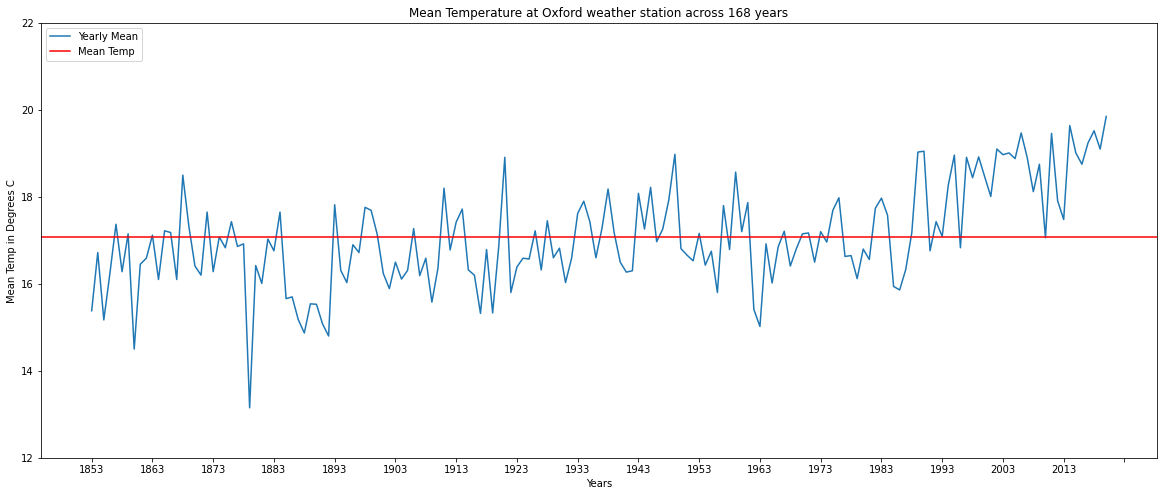

In [22]:


# MultipleLocator automatically spaces out xtick labels if there are a lot of them so the x-axis is not cluttered
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mean_max_temp = max(yearly_means)
mean_min_temp = min(yearly_means)
meany_line = (mean_max_temp + mean_min_temp) // 2
proper_mean = sum(yearly_means) / len(yearly_means)

fig, ax = plt.subplots(figsize=(20,8))
# plt.figure(figsize=(20,8))
plt.plot(years, yearly_means, label="Yearly Mean")
#The line below sets the x-axis to only show every tenth label
ax.xaxis.set_major_locator(MultipleLocator(10))
# plt.xticks(rotation=90)
plt.ylim(12, 22)
# plt.xticks(fontsize="x-small")
plt.axhline(y=proper_mean, c="red", label="Mean Temp")


plt.xlabel("Years")
plt.ylabel("Mean Temp in Degrees C")
plt.title("Mean Temperature at Oxford weather station across 168 years")
plt.legend(loc="upper left")
plt.show()

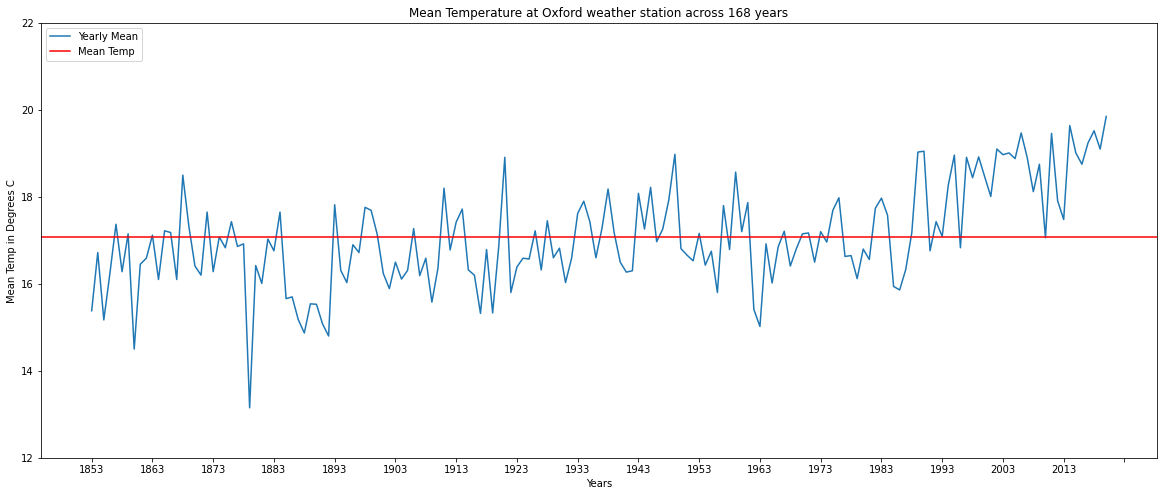

In [23]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mean_max_temp = max(yearly_means)
mean_min_temp = min(yearly_means)
meany_line = (mean_max_temp + mean_min_temp) // 2
proper_mean = sum(yearly_means) / len(yearly_means)

fig, ax = plt.subplots(figsize=(20,8))
# plt.figure(figsize=(20,8))
plt.plot(years, yearly_means, label="Yearly Mean")
ax.xaxis.set_major_locator(MultipleLocator(10))
# plt.xticks(rotation=90)
plt.ylim(12, 22)
# plt.xticks(fontsize="x-small")
plt.axhline(y=proper_mean, c="red", label="Mean Temp")


plt.xlabel("Years")
plt.ylabel("Mean Temp in Degrees C")
plt.title("Mean Temperature at Oxford weather station across 168 years")
plt.legend(loc="upper left")
plt.show()

The above graph appears to show that mean average temperatures for the year have been rising recently. 



### Further Questions I would like to answer

The earth revolves around the sun in an ellipse which in turn drives the seasons and temperature changes. 

This means that it is hotter in the summer and colder in the winter - in Oxford. 

So I will next look at how the mean temperature is changing each month over the 168 years.

For example: Is the weather changing in January? or July or through the whole year?

**Significance**

It is interesting to note that a **ONE** degree change in temperature is considered significant for global warming.

I have not used the same axis on each graph as I am comparing the mean for each month with itself. We would expect the temperature to be hotter in July than January so I do not feel that each month should use the same axis limits.

This will show if the if temperatures are changing all year round or only at certain times of the year. 



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
January Min_ temp -3.1
January Max Temp 12.85
8 4.0


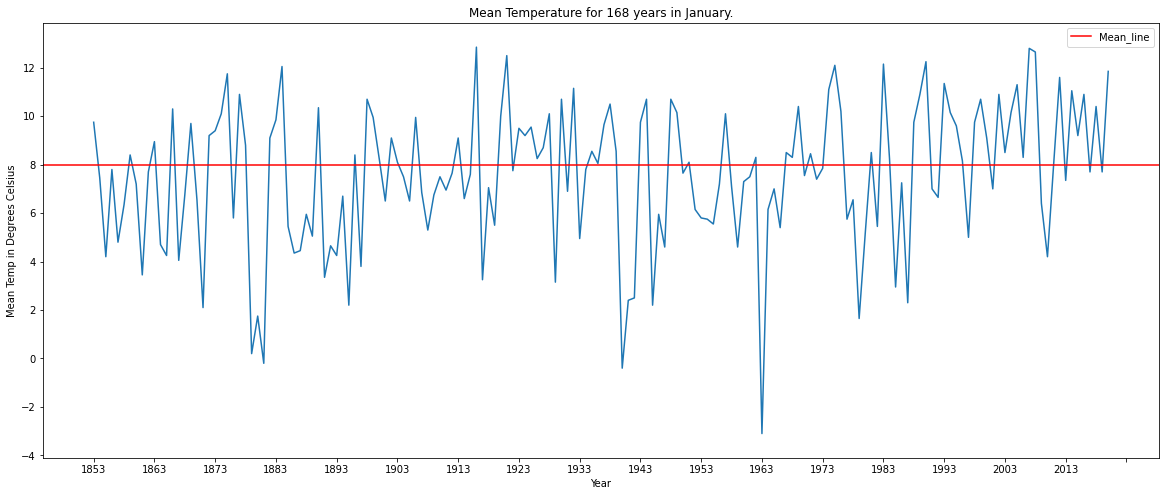

February Min_ temp -2.4
February Max Temp 13.95
8 5.0


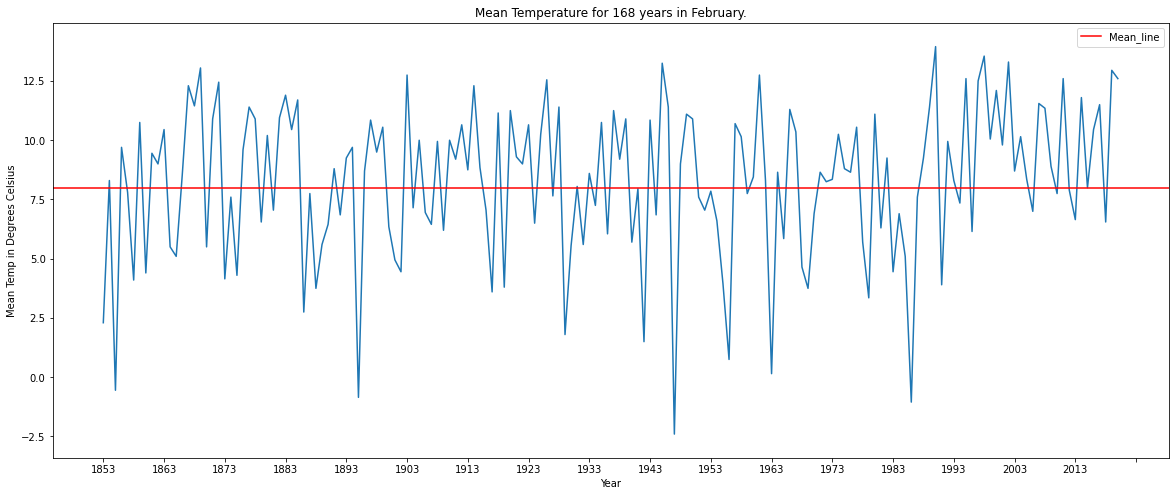

March Min_ temp 5.9
March Max Temp 17.65
11 11.0


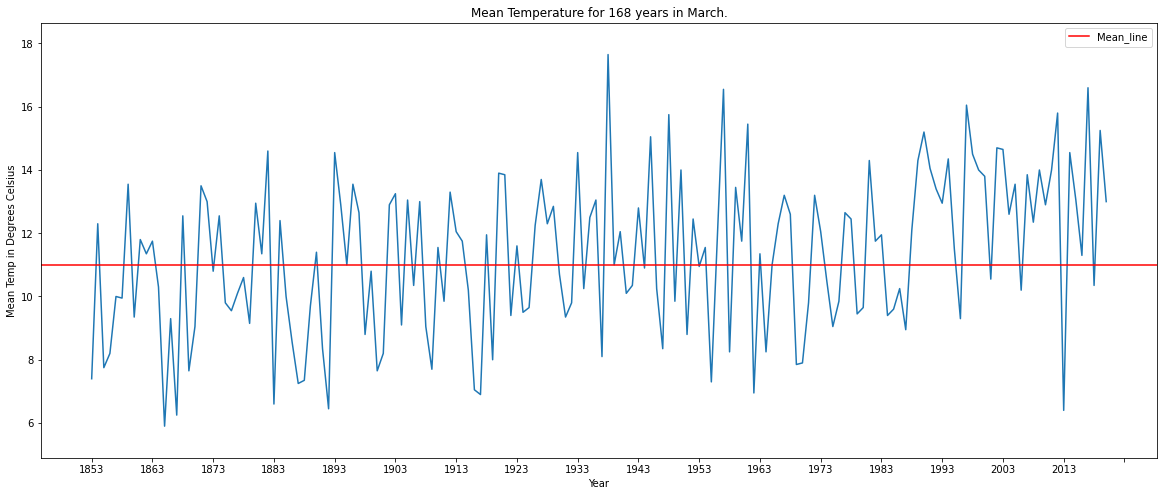

In [57]:
cleaned_data[:1]
jan_temps = []
calendar = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
           "October", "November", "December"]

def show_month_plot(data, month):
    
    month_figures = []
    for row in data:
        if row[1] == str(month):
            month_figures.append(row[6])

#   len(month_figures)
    max_temp = max(month_figures)
    min_temp = min(month_figures)
    print(calendar[month-1], "Min_ temp", min_temp)
    print(calendar[month-1], "Max Temp" , max_temp)
    mean_line = (max_temp + min_temp) // 2
    test = round(sum(month_figures) / len(month_figures))
    print(test, mean_line)
    fig, ax = plt.subplots(figsize=(20,8))
#     plt.figure(figsize=(20,8))
    ax.plot(years, month_figures)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.set_ylim(min_temp-1, max_temp + 1)
    plt.axhline(y=test, c="red", label="Mean_line")
#     plt.xticks(rotation=90, fontsize="x-small")
    plt.xlabel("Year")
    plt.legend()
    plt.ylabel("Mean Temp in Degrees Celsius")
    plt.title("Mean Temperature for 168 years in {}.".format(calendar[month-1]))
    plt.show()

    
months = list(range(1, 13))
print(months)
# test = sum(month_figures) / len(month_figures)
# print(test)



for item in months[0:3]:
    show_month_plot(cleaned_data, item)
# show_month_plot(cleaned_data, 1)




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
8 4.0


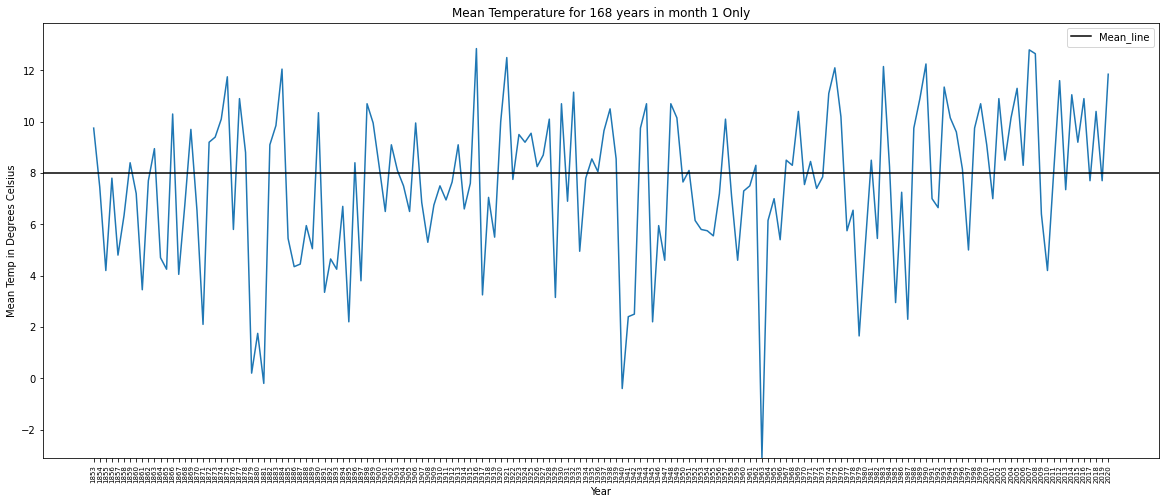

8 5.0


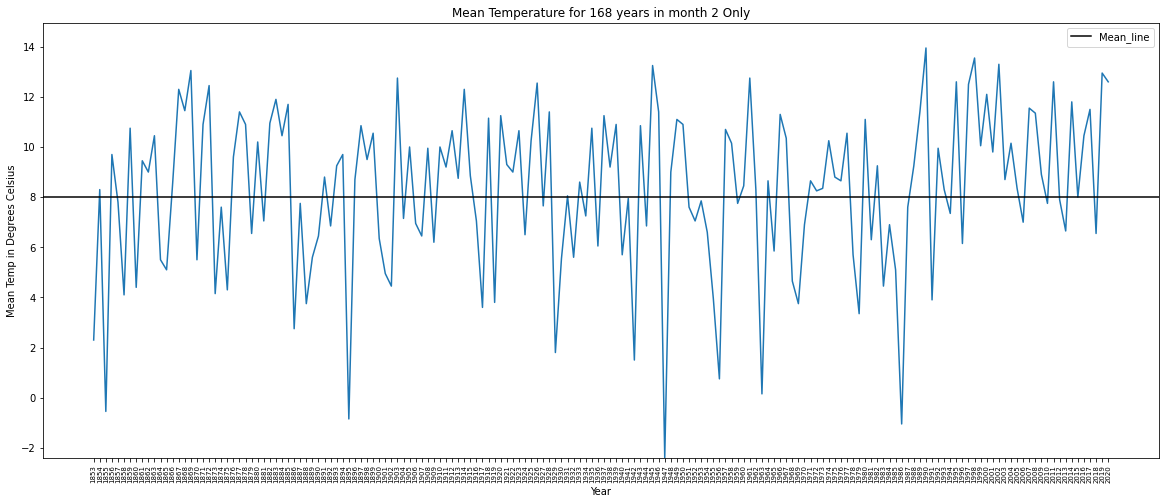

11 11.0


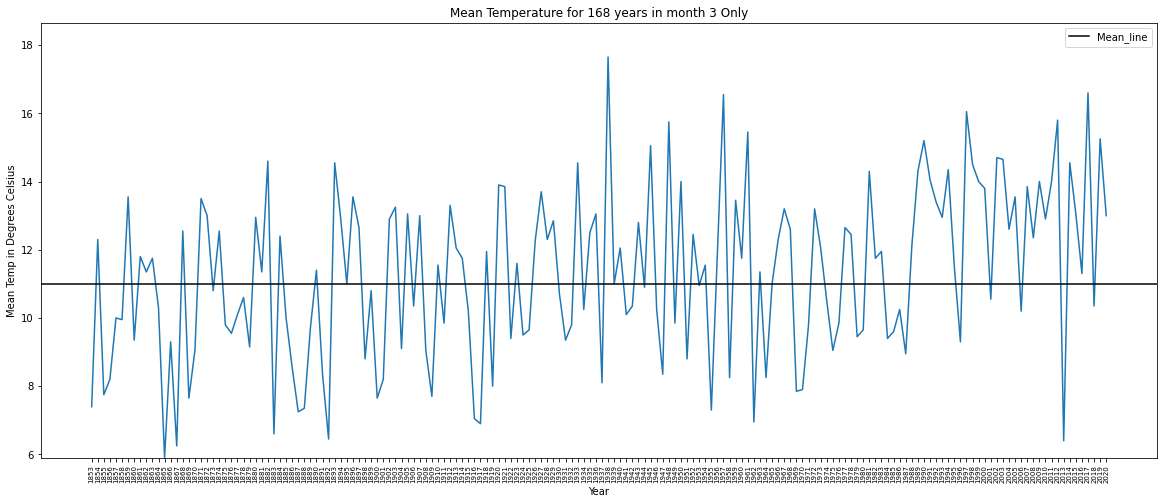

In [24]:
cleaned_data[:1]
jan_temps = []


def show_month_plot(data, month):
    
    month_figures = []
    for row in data:
        if row[1] == str(month):
            month_figures.append(row[6])

#   len(month_figures)
    max_temp = max(month_figures)
    min_temp = min(month_figures)
    mean_line = (max_temp + min_temp) // 2
    test = round(sum(month_figures) / len(month_figures))
    print(test, mean_line)
    plt.figure(figsize=(20,8))
    plt.plot(years, month_figures)
    plt.ylim(min_temp, max_temp + 1)
    plt.axhline(y=test, c="black", label="Mean_line")
    plt.xticks(rotation=90, fontsize="x-small")
    plt.xlabel("Year")
    plt.legend()
    plt.ylabel("Mean Temp in Degrees Celsius")
    plt.title("Mean Temperature for 168 years in month {} Only".format(month))
    plt.show()

    
months = list(range(1, 13))
print(months)
# test = sum(month_figures) / len(month_figures)
# print(test)



for item in months[0:3]:
    show_month_plot(cleaned_data, item)
# show_month_plot(cleaned_data, 1)




15 16.0


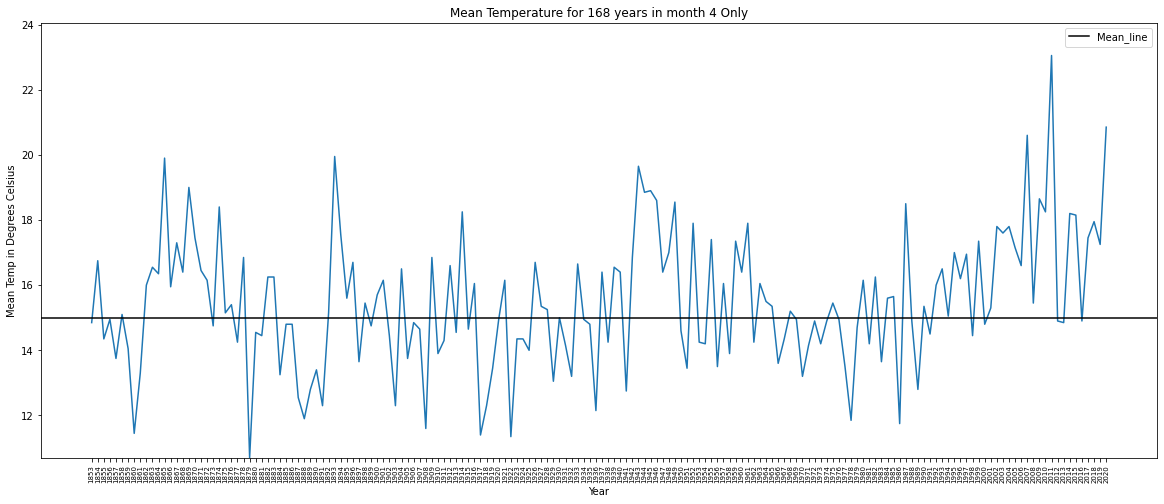

20 19.0


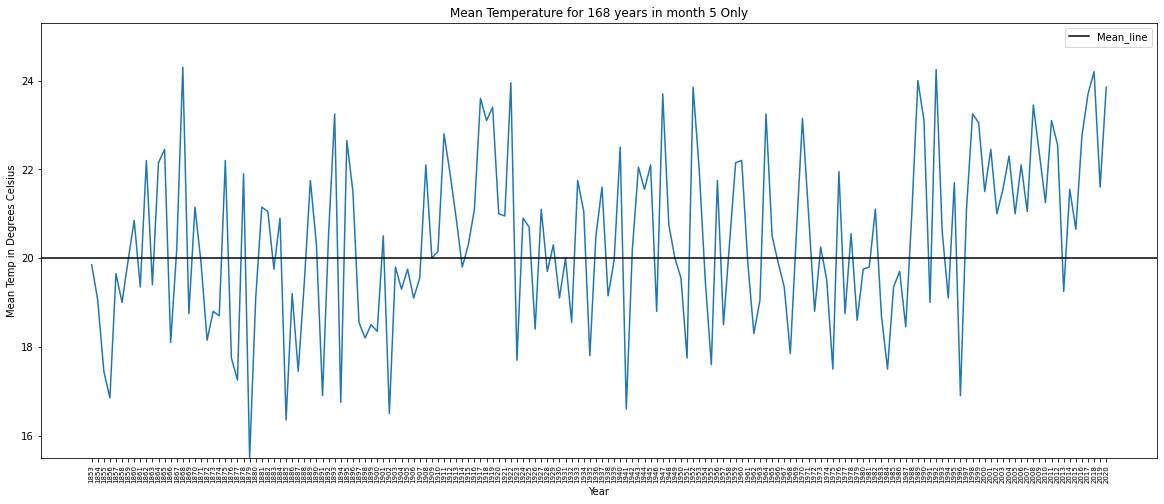

25 25.0


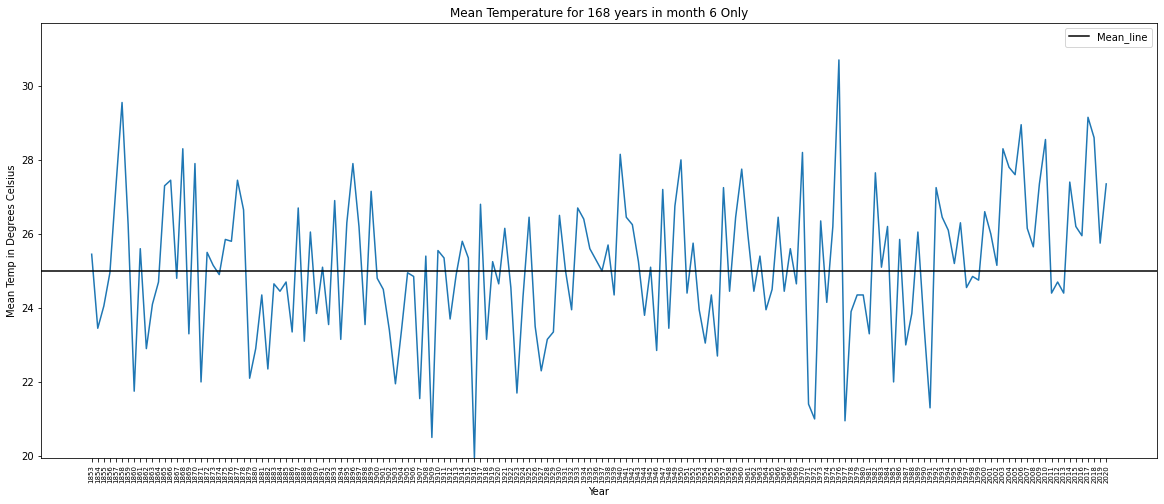

In [25]:
for item in months[3:6]:
    show_month_plot(cleaned_data, item)

28 28.0


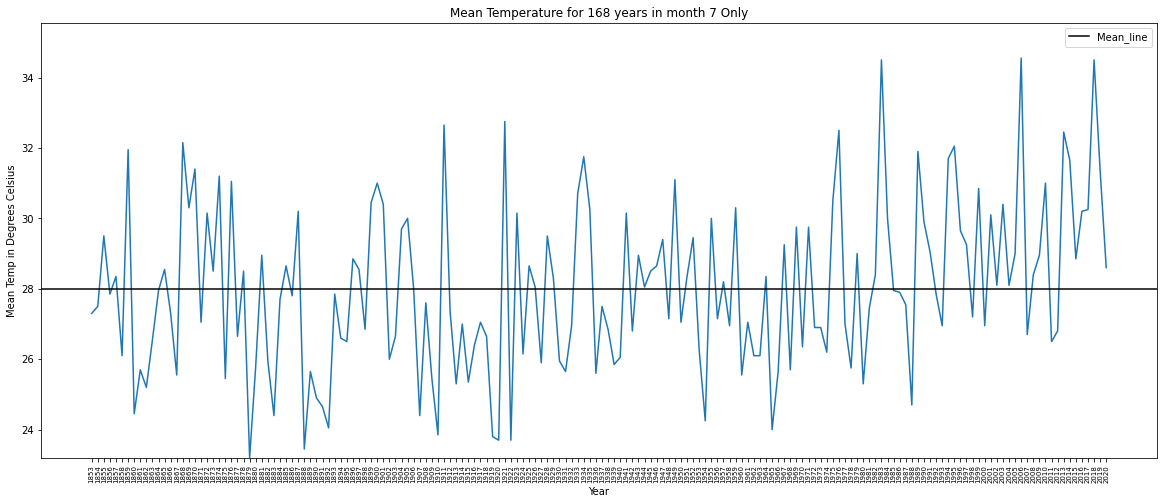

27 27.0


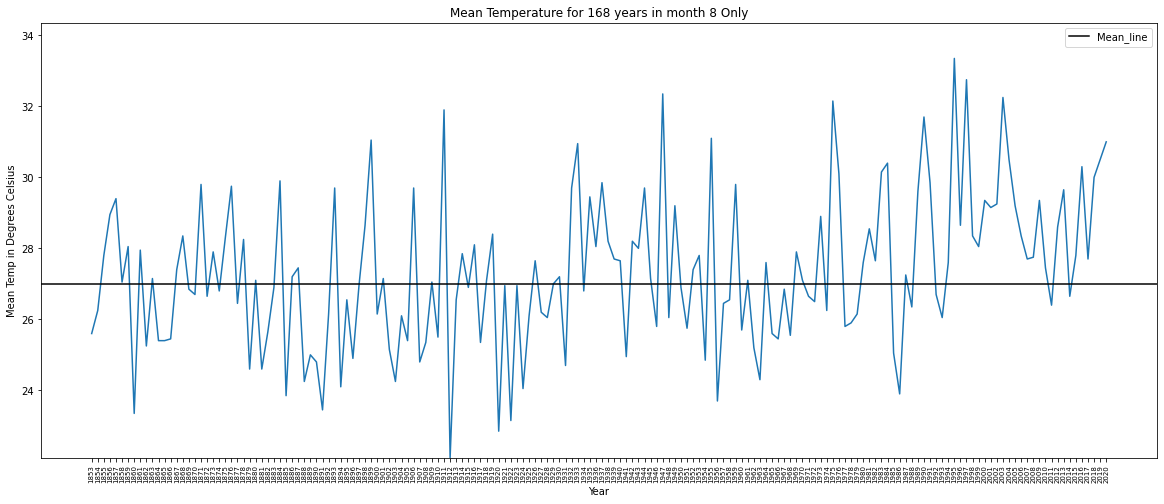

24 23.0


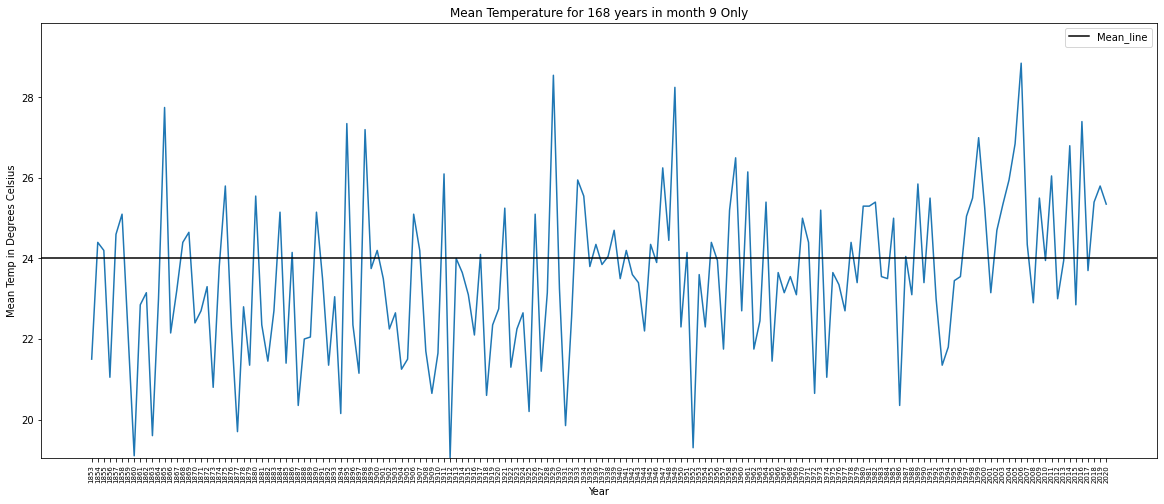

In [26]:
for item in months[6:9]:
    show_month_plot(cleaned_data, item)

18 18.0


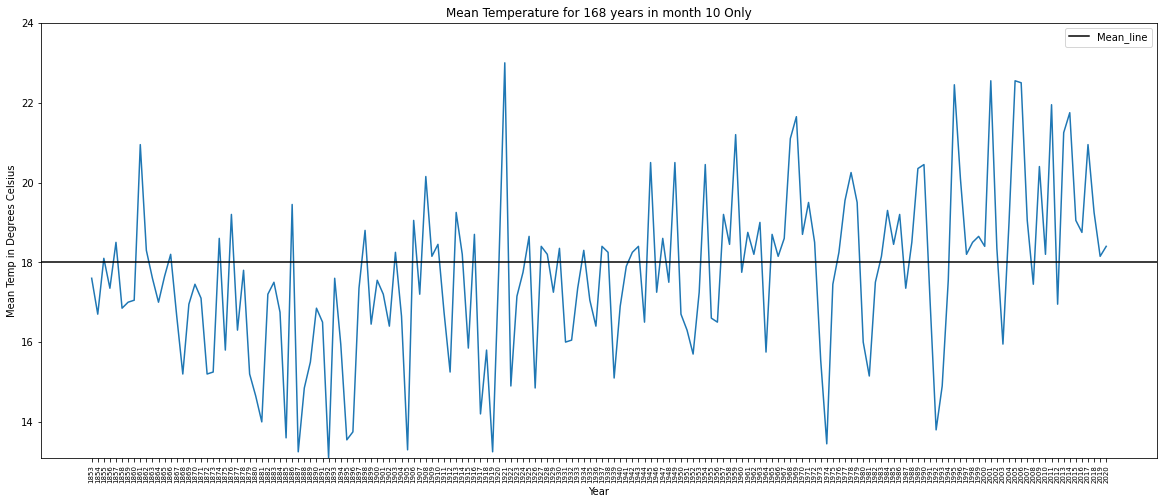

12 11.0


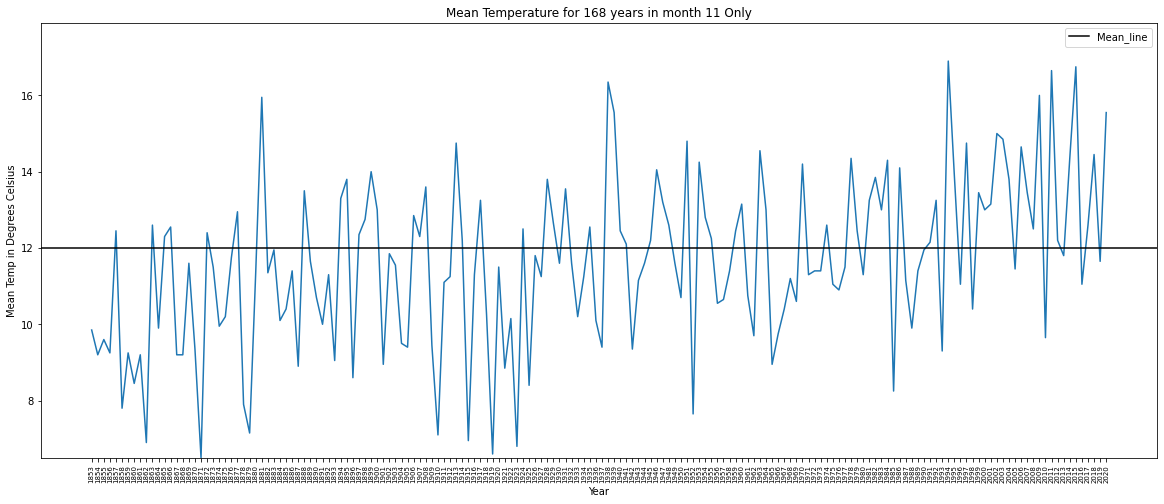

8 7.0


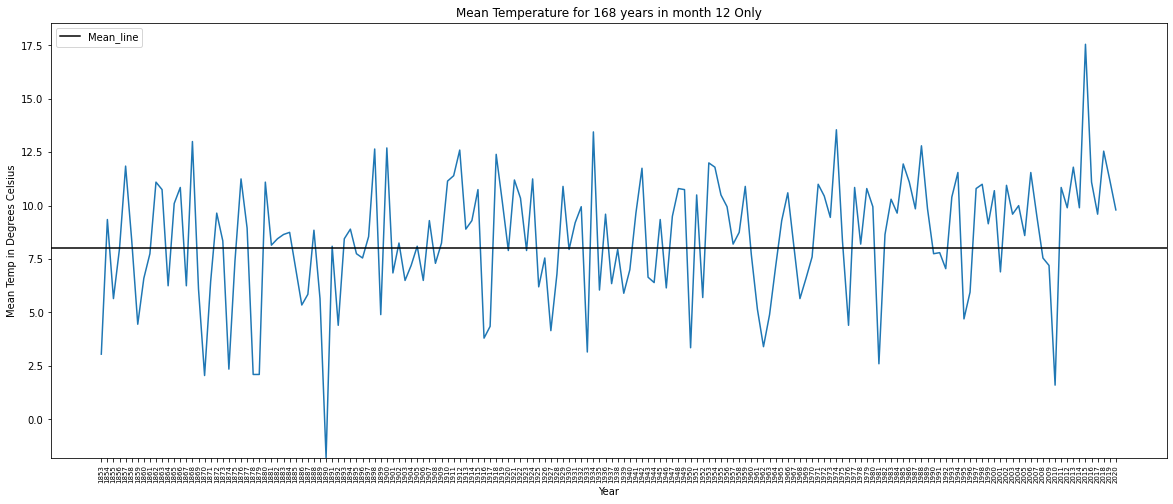

In [27]:
for item in months[9:12]:
    show_month_plot(cleaned_data, item)

##  Max and Min temperatures

Now I will look at how the **`maximum`** and **`minimum`** mean temperatures have changed over the 168 years

The question I want to ask is:
1. Are the coldest average temperatures changing?
2. Are the warmest average temperatures changing?



In [28]:

yearly_lows = []
yearly_highs = []


for item in ates:
    temp = 0
    for row in cleaned_data:
        if row[0] == item:
            temp += float(row[3])


    avg_temp = round(temp / 12, 2)
    yearly_lows.append(avg_temp)
#     years.append(item)
 
    
    
for item in ates:
    temp = 0
    for row in cleaned_data:
        if row[0] == item:
            temp += float(row[2])


    avg_temp = round(temp / 12, 2)
    yearly_highs.append(avg_temp)    


print(len(yearly_lows))
print(yearly_lows[:5])
print(len(yearly_highs))
print(yearly_highs[:5])


168
[5.12, 5.3, 4.97, 5.65, 6.34]
168
[12.82, 14.07, 12.69, 13.42, 14.2]


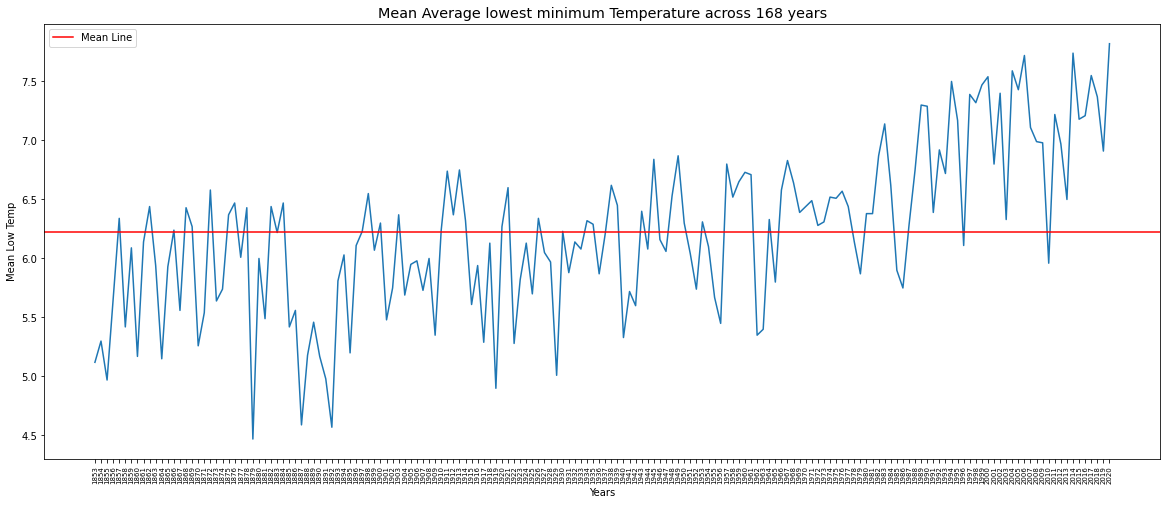

In [58]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

max_low = max(yearly_lows)
min_low = min(yearly_lows)
meany_mean_line = sum(yearly_lows) / len(yearly_lows)
plt.figure(figsize=(20,8))
plt.plot(years, yearly_lows)
plt.xticks(rotation=90, fontsize="x-small")
plt.axhline(y=meany_mean_line, c="red", label="Mean Line")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Mean Low Temp")
plt.title("Mean Average lowest minimum Temperature across 168 years", fontsize="x-large")
plt.show()

The average minimum temperature is steadily increasing. 

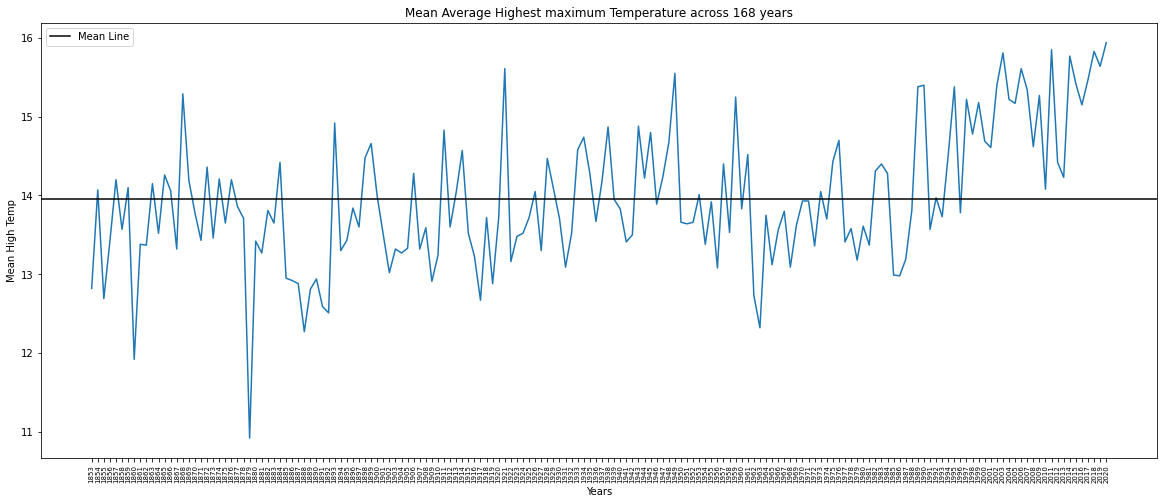

In [30]:
mean_highs = sum(yearly_highs) / len(yearly_highs)

plt.figure(figsize=(20,8))
plt.plot(years, yearly_highs)
plt.xticks(rotation=90, fontsize="x-small")
plt.axhline(y=mean_highs, c="black", label="Mean Line")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Mean High Temp")
plt.title("Mean Average Highest maximum Temperature across 168 years")
plt.show()

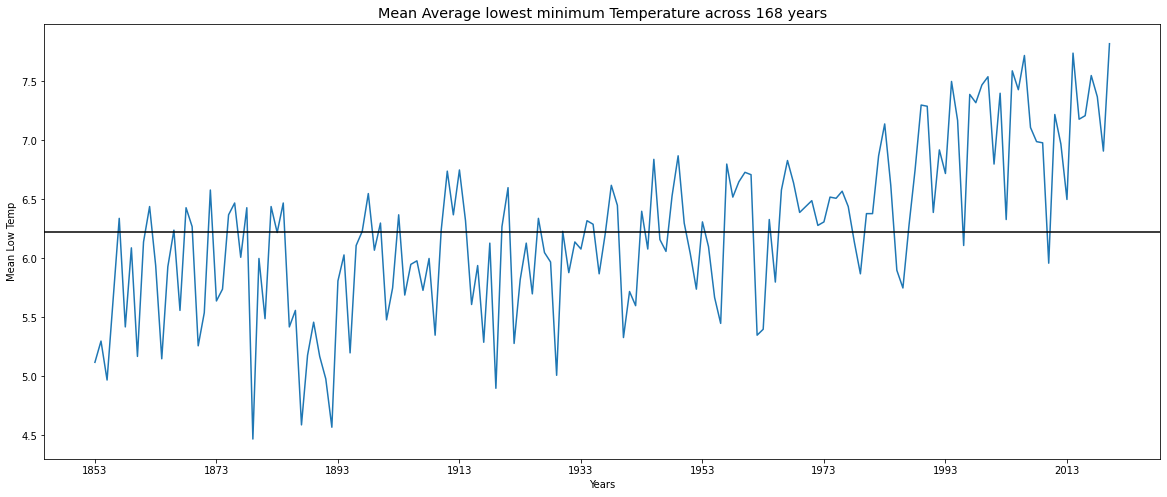

In [31]:
### This section is to experiment with tick labels so I can show decades instead of years

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20,8))
max_low = max(yearly_lows)
min_low = min(yearly_lows)
meany_mean_line = sum(yearly_lows) / len(yearly_lows)
# plt.figure(figsize=(20,8))
ax.plot(years, yearly_lows)
# ax.set_xticks(rotation=90, fontsize="x-small")
ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.set_axhline(y=meany_mean_line, c="black", label="Mean Line")
plt.axhline(y=meany_mean_line, c="black", label="Mean Line")
# plt.legend()
plt.xlabel("Years")
plt.ylabel("Mean Low Temp")
plt.title("Mean Average lowest minimum Temperature across 168 years", fontsize="x-large")
plt.show()

From these graphs it would appear that there is a rise in temperatures in Oxford from the 1970's onwards.

Next I will explore rainfalls. 



In [39]:
cleaned_data[:2]

#rain is at index 4

rain_data = []
for row in cleaned_data:
    rain = row[4]
    if rain == "":
        rain = 0
        row[4] = rain 
    elif rain != "":
        rain = rain.replace("*", "")
        rain = rain.replace("-", "")
        row[4] = rain
        rain_data.append(rain)
    

print(len(rain_data))

# Create a function to check for weird characters in the data by showing all the characters used

def check_chars(listy):
    char_result = []
    result = []
    for item in listy:
        for char in item:
            if char not in char_result:
                char_result.append(char)
        
        if item != "":
            item = float(item)
            result.append(item)
        elif item == "":
            item = 0
            result.append(item)
        
        char_result = sorted(char_result)
    return (result, char_result)

rain_num_data, rain_chars = check_chars(rain_data)
print(rain_chars)
print(len(rain_num_data))
print(sum(rain_num_data))

AttributeError: 'int' object has no attribute 'replace'

In [40]:
yearly_rain = []
rain_years = []

for item in ates:
    temp = 0
    for row in cleaned_data:
        if row[0] == item:
            temp += float(row[4])
#             print(temp)
    
    
    avg_rain = round(temp / 12, 2)
    yearly_rain.append(avg_rain)
    rain_years.append(item)
#     print(item, avg_rain)

    
mean_rain = sum(yearly_rain) / len(yearly_rain)
print(len(yearly_rain), len(rain_years))

168 168


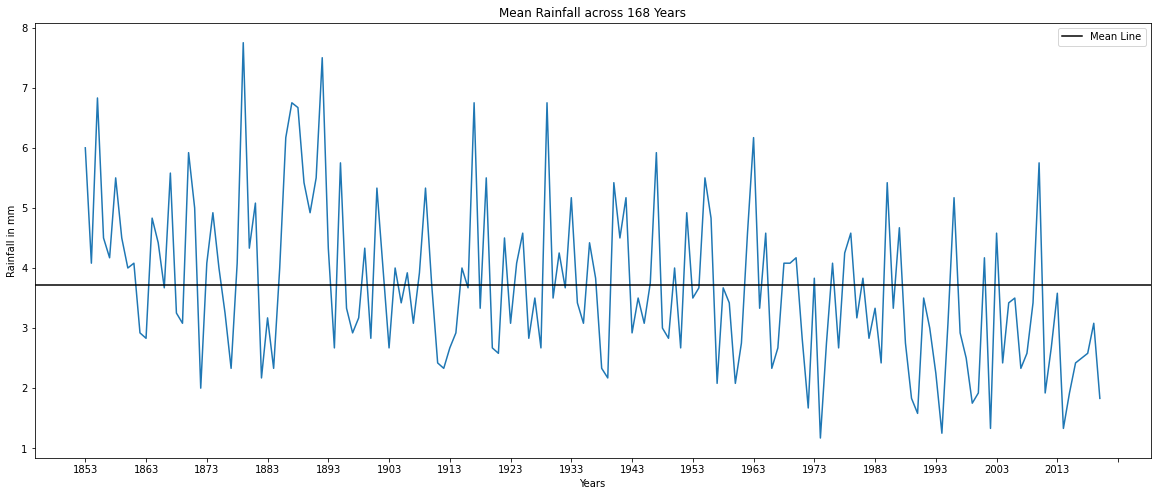

In [41]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20,8))

plt.plot(rain_years, yearly_rain)

plt.axhline(y=mean_rain, c="black", label="Mean Line")
ax.xaxis.set_major_locator(MultipleLocator(10))
plt.title("Mean Rainfall across 168 Years")
plt.ylabel("Rainfall in mm")
plt.legend()
plt.xlabel("Years")
plt.show()

The mean amount of rain each year is falling over the last 168 years. 

There appears to be an increase in temperatures and a decrease in rainfall. 

# Next Steps

I am looking forward to learning more statistics that I can use on this data. 

I would like to be able to use a boxplot style graph over the 168 years. So I would be able to see how the highest and lowest temperatures have been changing as well as the mean temperatures all on the same graph.



In [ ]:
### This section is to experiment with tick labels so I can show decades instead of years

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
max_low = max(yearly_lows)
min_low = min(yearly_lows)
meany_mean_line = sum(yearly_lows) / len(yearly_lows)
# plt.figure(figsize=(20,8))
ax.plot(years, yearly_lows)
ax.plot(years, yearly_highs)
# ax.set_xticks(rotation=90, fontsize="x-small")
ax.xaxis.set_major_locator(MultipleLocator(20))
plt.axhline(y=meany_mean_line, c="black", label="Mean Low Temp")
plt.axhline(y=mean_highs, c="red", label="Mean High Temp")
#plt.axhline(y=meany_mean_line, c="black", label="Mean Line")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Mean Low Temp")
plt.title("Mean Average lowest minimum Temperature across 168 years", fontsize="x-large")
plt.show()